In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('.//filtered_data2.csv', encoding='gb2312')
data.info()

features = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17751 entries, 0 to 17750
Data columns (total 30 columns):
Name                              17751 non-null object
Currency                          17751 non-null object
Top Category                      17751 non-null object
Category                          17751 non-null object
Updates                           17751 non-null int64
Comments                          17751 non-null int64
Rewards                           17751 non-null int64
Goal                              17751 non-null float64
Pledged                           17751 non-null float64
Backers                           17751 non-null int64
Start                             17751 non-null object
End                               17751 non-null object
Duration in Days                  17751 non-null int64
Facebook Friends                  17751 non-null int64
Facebook Shares                   17751 non-null int64
Creator - # Projects Created      17751 non-null int64
C

In [3]:
features['Name'].str.contains(r'\?').value_counts()

False    17603
True       148
Name: Name, dtype: int64

In [4]:
features['Name'].str.contains('!').value_counts()

False    15931
True      1820
Name: Name, dtype: int64

In [5]:
features['Name'].str.istitle().value_counts()

False    11604
True      6147
Name: Name, dtype: int64

In [6]:
features['result'] = features['Result']

features['lenth_chars'] = features['Name'].str.len()

features['contains_!'] = pd.get_dummies(features['Name'].str.contains('!'), drop_first=True)

features['contains_?'] = pd.get_dummies(features['Name'].str.contains(r'\?'), drop_first=True)

features['contains_title'] = pd.get_dummies(features['Name'].str.istitle(), drop_first=True)

In [7]:
features['log_goal'] = np.log10(features['Goal'])

features['log_pledged'] = np.log10(features['Pledged'])

features['duration'] = features['Duration in Days']

features['top_category'] = features['Top Category']

In [8]:
features['contains_!'] = features['contains_!'].astype('int')
features['contains_?'] = features['contains_?'].astype('int')
features['contains_title'] = features['contains_title'].astype('int')

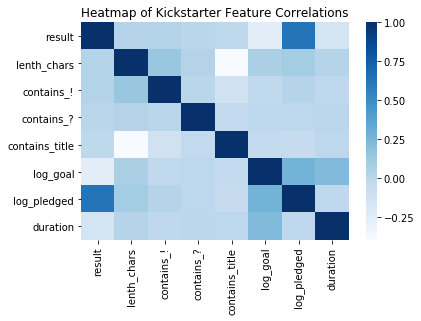

In [9]:
sns.heatmap(features.iloc[:, 30: ].corr(), cmap='Blues')

plt.title('Heatmap of Kickstarter Feature Correlations')
plt.show()

In [10]:
#features['updates'] = features['Updates']

#features['comments'] = features['Comments']

#features['faq'] = features['# FAQs']

features['rewards'] = features['Rewards']

features['fb_friends'] = features['Facebook Friends']

features['fb_shares'] = features['Facebook Shares']

features['creator_projects_created'] = features['Creator - # Projects Created']

features['creator_projects_backed'] = features['Creator - # Projects Backed']

features['videos'] = features['# Videos']

features['images'] = features['# Images']

features['description_words'] = features['# Words (Description)']

features['r_c_words'] = features['# Words (Risks and Challenges)']


In [11]:
features['pledged_percent1'] = features['r1'] / features['Goal']

features['pledged_percent2'] = features['r2'] / features['Goal']

features['pledged_percent3'] = features['r3'] / features['Goal']

features['backers1'] = features['f1']

features['backers2'] = features['f2']

features['backers3'] = features['f3']

In [12]:
features = pd.get_dummies(features, columns = ['top_category'])

In [13]:
features.rename(columns={"top_category_Film & Video": "top_category_Film"}, inplace=True)

In [14]:
features = features.iloc[:, 30:]
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17751 entries, 0 to 17750
Data columns (total 38 columns):
result                      17751 non-null int64
lenth_chars                 17751 non-null int64
contains_!                  17751 non-null int64
contains_?                  17751 non-null int64
contains_title              17751 non-null int64
log_goal                    17751 non-null float64
log_pledged                 17751 non-null float64
duration                    17751 non-null int64
rewards                     17751 non-null int64
fb_friends                  17751 non-null int64
fb_shares                   17751 non-null int64
creator_projects_created    17751 non-null int64
creator_projects_backed     17751 non-null int64
videos                      17751 non-null int64
images                      17751 non-null int64
description_words           17751 non-null int64
r_c_words                   17751 non-null int64
pledged_percent1            17751 non-null float64
ple

In [15]:
features = features.drop(['log_pledged'], 1)

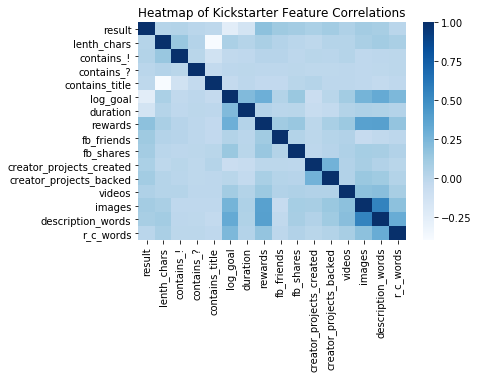

In [16]:
sns.heatmap(features.iloc[: , :16].corr(), cmap='Blues')

plt.title('Heatmap of Kickstarter Feature Correlations')
plt.show()

# Classification

In [17]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc 

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 1.without category feature & dynamic features

In [39]:
features_1 = features.iloc[: , :16]
features_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17751 entries, 0 to 17750
Data columns (total 16 columns):
result                      17751 non-null int64
lenth_chars                 17751 non-null int64
contains_!                  17751 non-null int64
contains_?                  17751 non-null int64
contains_title              17751 non-null int64
log_goal                    17751 non-null float64
duration                    17751 non-null int64
rewards                     17751 non-null int64
fb_friends                  17751 non-null int64
fb_shares                   17751 non-null int64
creator_projects_created    17751 non-null int64
creator_projects_backed     17751 non-null int64
videos                      17751 non-null int64
images                      17751 non-null int64
description_words           17751 non-null int64
r_c_words                   17751 non-null int64
dtypes: float64(1), int64(15)
memory usage: 2.2 MB


In [19]:
X = features_1.drop(['result'], 1)
y = features_1['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
# Logistic Regression
lr = LogisticRegression(penalty='l2', solver='liblinear')

# Fit the model.
lr_fit = lr.fit(X_train, y_train)

In [21]:
lr_test_y_score = lr_fit.decision_function(X_test)
lr_prediction = lr_fit.predict(X_test)
print(lr_test_y_score)
print(lr_prediction)

[-2.61073476  0.7577519  -0.26401795 ...  0.14092306  1.24953111
  0.23112375]
[0 1 0 ... 1 1 1]


In [22]:
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = roc_curve(y_test, lr_test_y_score)  ###计算真正率和假正率
roc_auc = auc(fpr, tpr)  ###计算auc的值
print(roc_auc)

0.8539356709312033


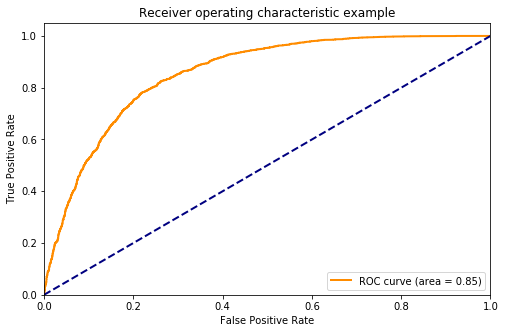

In [23]:
lw = 2
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [24]:
print('\n Accuracy by success')
print(pd.crosstab(lr_prediction, y_test))

print('\n Percentage accuracy')
print(lr.score(X_test, y_test))


 Accuracy by success
result     0     1
row_0             
0       2114   609
1        572  2031

 Percentage accuracy
0.7782576042057829


In [25]:
# Random Forest
rfc = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=200)

rfc.fit(X_train, y_train)

rfc_test_y_score = rfc.predict_proba(X_test)
rfc_prediction = rfc.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, rfc_test_y_score[:, 1])  ###计算真正率和假正率
roc_auc = auc(fpr, tpr)  ###计算auc的值
print(roc_auc)

acc_rfc = round(rfc.score(X_test, y_test) *100, 2)
acc_rfc

0.8948547039644397


81.62

In [28]:
#kNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train, y_train)

knn_test_y_score = knn.predict_proba(X_test)
knn_prediction = knn.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, knn_test_y_score[:, 1])  ###计算真正率和假正率
roc_auc = auc(fpr, tpr)  ###计算auc的值
print(roc_auc)

acc_neigh = round(knn.score(X_test, y_test) *100, 2)
acc_neigh

0.7130492847311537


67.56

In [29]:
#Gradient Boosting Classifier
clf_gb = GradientBoostingClassifier(n_estimators=500, 
                                 max_depth=1, 
                                 random_state=0)
clf_gb.fit(X_train, y_train)

gbdt_test_y_score = clf_gb.predict_proba(X_test)
gbdt_prediction = clf_gb.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, gbdt_test_y_score[:, 1])  ###计算真正率和假正率
roc_auc = auc(fpr, tpr)  ###计算auc的值
print(roc_auc)

acc_clf_gb = round(clf_gb.score(X_test, y_test) * 100, 2)
acc_clf_gb

0.8987537089058868


81.84

## 2.with category data

In [77]:
features_2 = features.drop(['pledged_percent1', 'pledged_percent2', 'pledged_percent3', 'backers1', 'backers2', 'backers3'], axis=1)
features_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17751 entries, 0 to 17750
Data columns (total 31 columns):
result                      17751 non-null int64
lenth_chars                 17751 non-null int64
contains_!                  17751 non-null int64
contains_?                  17751 non-null int64
contains_title              17751 non-null int64
log_goal                    17751 non-null float64
duration                    17751 non-null int64
rewards                     17751 non-null int64
fb_friends                  17751 non-null int64
fb_shares                   17751 non-null int64
creator_projects_created    17751 non-null int64
creator_projects_backed     17751 non-null int64
videos                      17751 non-null int64
images                      17751 non-null int64
description_words           17751 non-null int64
r_c_words                   17751 non-null int64
top_category_Art            17751 non-null uint8
top_category_Comics         17751 non-null uint8
top_cat

In [78]:
X = features_2.drop(['result'], 1)
y = features_2['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [79]:
# Logistic Regression
lr = LogisticRegression(penalty='l2', solver='liblinear')

# Fit the model.
lr_fit = lr.fit(X_train, y_train)

lr_test_y_score = lr_fit.decision_function(X_test)
lr_prediction = lr_fit.predict(X_test)

# Compute ROC curve and ROC area for each class
lr_fpr, lr_tpr, threshold = roc_curve(y_test, lr_test_y_score)  ###计算真正率和假正率
lr_roc_auc = auc(lr_fpr, lr_tpr)  ###计算auc的值
#print(roc_auc)

pred_y_sklearn = lr.predict(X_test)

print('\n Accuracy by success')
print(pd.crosstab(pred_y_sklearn, y_test))

print('\n Percentage accuracy')
print(lr.score(X_test, y_test))


 Accuracy by success
result     0     1
row_0             
0       2114   589
1        572  2051

 Percentage accuracy
0.7820127675553886


In [80]:
# Random Forest
rfc = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=200)

rfc.fit(X_train, y_train)

rfc_test_y_score = rfc.predict_proba(X_test)
rfc_prediction = rfc.predict(X_test)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rfc_test_y_score[:, 1])  ###计算真正率和假正率
rf_roc_auc = auc(rf_fpr, rf_tpr)  ###计算auc的值
#print(roc_auc)

acc_rfc = round(rfc.score(X_test, y_test) *100, 2)
acc_rfc

81.94

In [81]:
#kNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train, y_train)

knn_test_y_score = knn.predict_proba(X_test)
knn_prediction = knn.predict(X_test)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_test_y_score[:, 1])  ###计算真正率和假正率
knn_roc_auc = auc(knn_fpr, knn_tpr)  ###计算auc的值
#print(roc_auc)

acc_knn = round(knn.score(X_test, y_test) *100, 2)
acc_knn

67.56

In [82]:
#Gradient Boosting Classifier
clf_gb = GradientBoostingClassifier(n_estimators=500, 
                                 max_depth=1, 
                                 random_state=0)
clf_gb.fit(X_train, y_train)

gbdt_test_y_score = clf_gb.predict_proba(X_test)
gbdt_prediction = clf_gb.predict(X_test)

gbdt_fpr, gbdt_tpr, _ = roc_curve(y_test, gbdt_test_y_score[:, 1])  ###计算真正率和假正率
gbdt_roc_auc = auc(gbdt_fpr, gbdt_tpr)  ###计算auc的值
#print(roc_auc)

acc_clf_gb = round(clf_gb.score(X_test, y_test) * 100, 2)
acc_clf_gb

81.96

## 3. with category data & dynamic data

In [59]:
features_4 = features

In [60]:
X = features_4.drop(['result'], 1)
y = features_4['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [69]:
# Logistic Regression
lr = LogisticRegression(penalty='l2', solver='liblinear')

# Fit the model.
lr_fit = lr.fit(X_train, y_train)

lr_test_y_score = lr_fit.decision_function(X_test)
lr_prediction = lr_fit.predict(X_test)

# Compute ROC curve and ROC area for each class
lr_fpr, lr_tpr, threshold = roc_curve(y_test, lr_test_y_score)  ###计算真正率和假正率
lr_roc_auc = auc(lr_fpr, lr_tpr)  ###计算auc的值
#print(roc_auc)

pred_y_sklearn = lr.predict(X_test)

print('\n Accuracy by success')
print(pd.crosstab(pred_y_sklearn, y_test))

print('\n Percentage accuracy')
print(lr.score(X_test, y_test))


 Accuracy by success
result     0     1
row_0             
0       2668   552
1        273  2365

 Percentage accuracy
0.8591669511778764


In [75]:
# Random Forest
rfc = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=200)

rfc.fit(X_train, y_train)

rfc_test_y_score = rfc.predict_proba(X_test)
rfc_prediction = rfc.predict(X_test)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rfc_test_y_score[:, 1])  ###计算真正率和假正率
rf_roc_auc = auc(rf_fpr, rf_tpr)  ###计算auc的值
#print(roc_auc)

acc_rfc = round(rfc.score(X_test, y_test) *100, 2)
acc_rfc

88.22

In [71]:
#kNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train, y_train)

knn_test_y_score = knn.predict_proba(X_test)
knn_prediction = knn.predict(X_test)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_test_y_score[:, 1])  ###计算真正率和假正率
knn_roc_auc = auc(knn_fpr, knn_tpr)  ###计算auc的值
#print(roc_auc)

acc_knn = round(knn.score(X_test, y_test) *100, 2)
acc_knn

69.96

In [72]:
#Gradient Boosting Classifier
clf_gb = GradientBoostingClassifier(n_estimators=500, 
                                 max_depth=1, 
                                 random_state=0)
clf_gb.fit(X_train, y_train)

gbdt_test_y_score = clf_gb.predict_proba(X_test)
gbdt_prediction = clf_gb.predict(X_test)

gbdt_fpr, gbdt_tpr, _ = roc_curve(y_test, gbdt_test_y_score[:, 1])  ###计算真正率和假正率
gbdt_roc_auc = auc(gbdt_fpr, gbdt_tpr)  ###计算auc的值
#print(roc_auc)

acc_clf_gb = round(clf_gb.score(X_test, y_test) * 100, 2)
acc_clf_gb

88.14

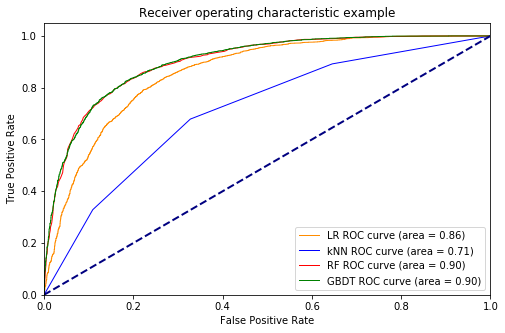

In [83]:
lw = 2
plt.figure(figsize=(8, 5))
plt.plot(lr_fpr, lr_tpr, color='darkorange',
         lw=1, label='LR ROC curve (area = %0.2f)' % lr_roc_auc)  
plt.plot(knn_fpr, knn_tpr, color='blue',
         lw=1, label='kNN ROC curve (area = %0.2f)' % knn_roc_auc)  
plt.plot(rf_fpr, rf_tpr, color='red',
         lw=1, label='RF ROC curve (area = %0.2f)' % rf_roc_auc)  
plt.plot(gbdt_fpr, gbdt_tpr, color='green',
         lw=1, label='GBDT ROC curve (area = %0.2f)' % gbdt_roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')###假正率为横坐标，真正率为纵坐标做曲线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()